In [ ]:
! pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:01<00:00, 74.0MB/s]
100% 163M/163M [00:01<00:00, 91.6MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall('/content/')  # Specify extraction path to /content/
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files =os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1071.jpg', 'with_mask_1173.jpg', 'with_mask_1521.jpg', 'with_mask_3269.jpg', 'with_mask_272.jpg']
['with_mask_1107.jpg', 'with_mask_54.jpg', 'with_mask_3330.jpg', 'with_mask_3504.jpg', 'with_mask_191.jpg']


In [ ]:
without_mask_files =os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2276.jpg', 'without_mask_93.jpg', 'without_mask_1801.jpg', 'without_mask_1508.jpg', 'without_mask_2780.jpg']
['without_mask_2341.jpg', 'without_mask_3784.jpg', 'without_mask_3568.jpg', 'without_mask_2434.jpg', 'without_mask_3825.jpg']


In [ ]:
print('number of with mask images:' ,len(with_mask_files))
print('number of without mask images:' ,len(without_mask_files))

number of with mask images: 3725
number of without mask images: 3828


CREATE LABLE FOR TWO CLASS ***IMAGES***
with mask=1
without mask=0

In [ ]:
with_mask_label = [1]*3725
without_mask_files=[0]*3828

In [ ]:
print(with_mask_label[0:5])
print(without_mask_files[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_label))
print(len(without_mask_files))

3725
3828


In [ ]:
lables=with_mask_label+without_mask_files
print(len(lables))
print(lables[0:5])
print(lables[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


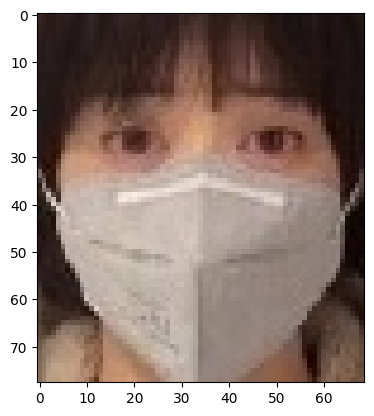

In [ ]:
# display one with mask image and one without
img= mpimg.imread('/content/data/with_mask/with_mask_573.jpg')
imgplot = plt.imshow(img)
plt.show()

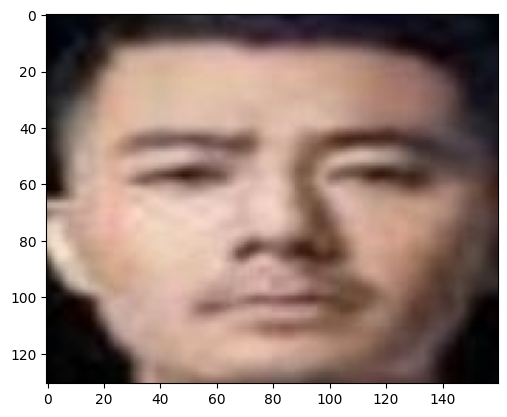

In [ ]:
img= mpimg.imread('/content/data/without_mask/without_mask_103.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing
1.Resize The Images
2.convert images to numpay np.array

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

# Make sure to define with_mask_files before using it
with_mask_files = os.listdir('/content/data/with_mask')
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'

# Make sure 'without_mask_files' is also defined
without_mask_files = os.listdir('/content/data/without_mask')

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 71,  30,  24],
        [ 85,  44,  38],
        [113,  73,  65],
        ...,
        [ 50,  26,  22],
        [ 55,  31,  27],
        [ 58,  34,  30]],

       [[ 82,  41,  35],
        [ 96,  56,  50],
        [127,  87,  79],
        ...,
        [ 48,  24,  20],
        [ 52,  28,  24],
        [ 55,  31,  27]],

       [[ 95,  54,  47],
        [111,  71,  63],
        [142, 102,  94],
        ...,
        [ 47,  23,  19],
        [ 50,  26,  22],
        [ 52,  28,  24]],

       ...,

       [[ 64,  37,  26],
        [ 63,  36,  25],
        [ 62,  35,  24],
        ...,
        [154, 118, 117],
        [182, 152, 153],
        [196, 169, 171]],

       [[ 68,  40,  29],
        [ 66,  39,  28],
        [ 65,  38,  26],
        ...,
        [181, 149, 148],
        [183, 158, 159],
        [183, 161, 164]],

       [[ 71,  42,  30],
        [ 69,  41,  29],
        [ 65,  38,  27],
        ...,
        [196, 167, 166],
        [175, 152, 153],
        [161, 142, 145]]], dtype=uint8)
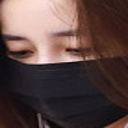

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# convert image list and lable list to mumpay array
x=np.array(data)
y=np.array(lables)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)


(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


TRAIN Test Data


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [ ]:
# scaling the data
X_train_scaled =X_train/255
X_test_scaled =X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.12156863, 0.23137255, 0.28627451],
        [0.11372549, 0.22745098, 0.27843137],
        [0.10588235, 0.21568627, 0.2627451 ],
        ...,
        [0.27058824, 0.3254902 , 0.3372549 ],
        [0.27058824, 0.3254902 , 0.3372549 ],
        [0.27843137, 0.33333333, 0.34117647]],

       [[0.10588235, 0.21568627, 0.26666667],
        [0.10588235, 0.21176471, 0.2627451 ],
        [0.10196078, 0.20392157, 0.25490196],
        ...,
        [0.25490196, 0.30980392, 0.32156863],
        [0.2627451 , 0.31764706, 0.3254902 ],
        [0.26666667, 0.32156863, 0.3254902 ]],

       [[0.11372549, 0.21176471, 0.2627451 ],
        [0.10196078, 0.2       , 0.25098039],
        [0.10588235, 0.2       , 0.24705882],
        ...,
        [0.24313725, 0.29803922, 0.31372549],
        [0.23529412, 0.29411765, 0.30196078],
        [0.2627451 , 0.31764706, 0.32156863]],

       ...,

       [[0.11372549, 0.17254902, 0.20784314],
        [0.11764706, 0.17647059, 0.20784314],
        [0.12941176, 0

**Building a Convolutional Neural Network(CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
number_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3,),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

In [ ]:
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

In [ ]:
model.add(keras.layers.Dense(number_of_classes,activation='sigmoid'))

In [ ]:
# compile nural network
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# training the neural netwo
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 146s 845ms/step - acc: 0.6681 - loss: 0.8340 - val_acc: 0.8992 - val_loss: 0.2663
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 850ms/step - acc: 0.8814 - loss: 0.2960 - val_acc: 0.8909 - val_loss: 0.2271
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 201s 843ms/step - acc: 0.9059 - loss: 0.2327 - val_acc: 0.9322 - val_loss: 0.1854
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 852ms/step - acc: 0.9145 - loss: 0.2140 - val_acc: 0.9223 - val_loss: 0.1840
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 200s 844ms/step - acc: 0.9322 - loss: 0.1705 - val_acc: 0.9289 - val_loss: 0.1811


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 287ms/step - acc: 0.9089 - loss: 0.2071
Test Accuracy = 0.9179351329803467


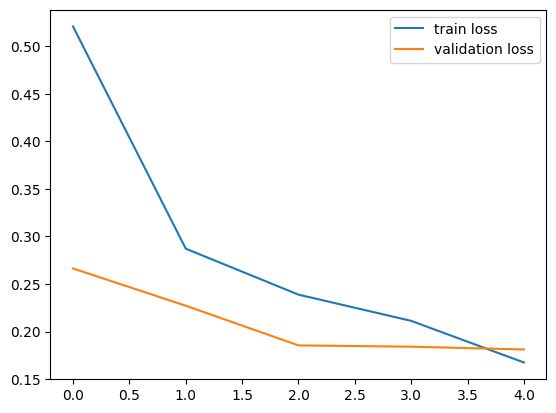

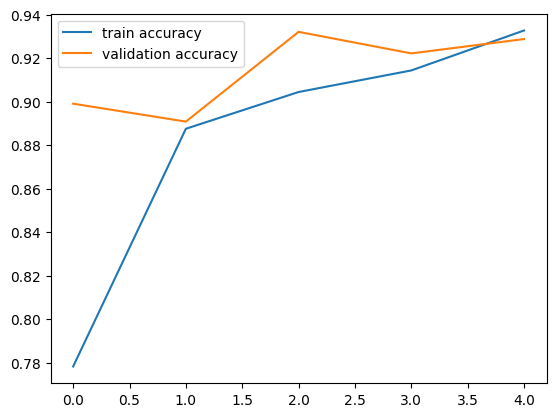

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/me.jpg


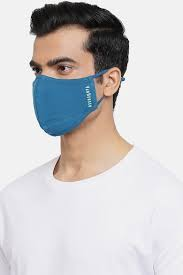

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.29971427 0.67490643]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')